Dataset: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

# **Goal:**

Building a model to classify crops based on environmental conditions.
The goal is to predict which crop type is best suited for given environmental and soil conditions. This is a typical supervised classification problem, where the output (crop type) is categorical, and the input features are the environmental factors like soil nutrients, temperature, humidity, pH, and rainfall.
This will involve an exploration of how various crops respond to specific conditions, such as soil nutrient content, climatic factors like temperature and humidity, and rainfall patterns.

# **Statistical and Predictive Modeling:**

While statistical analysis like ANOVA and correlation analysis helps in understanding relationships between variables, the main predictive task focuses on classifying crop types based on various factors. The ultimate aim is to inform decision-making for optimal crop selection.

# **Context**

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

# **Data fields**

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import ensemble
from scipy import stats

In [2]:
df = pd.read_csv('Crop_recommendation.csv.xls')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
print(f"Columns:", df.columns)

print(f"Label :", df['label'].unique())

print(f"Total number of Label:", len(df['label'].unique()))

Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Label : ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total number of Label: 22


# **Data Visualization**

Plot distributions of soil nutrients (N, P, K) across crop types:

In [7]:
import warnings
warnings.filterwarnings('ignore')

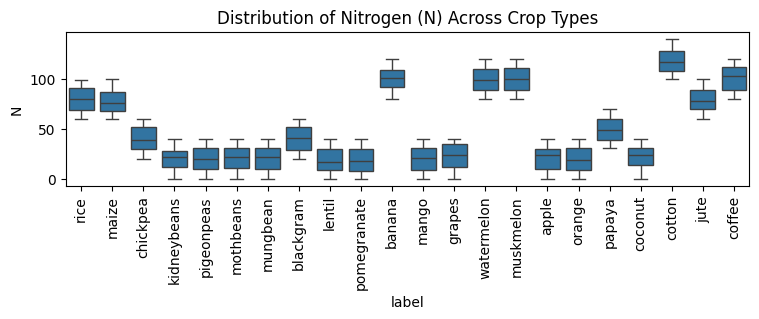

In [8]:
plt.figure(figsize=(30,2))

# Nitrogen Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='N', data=df)
plt.title('Distribution of Nitrogen (N) Across Crop Types')
plt.xticks(rotation=90)
plt.show()

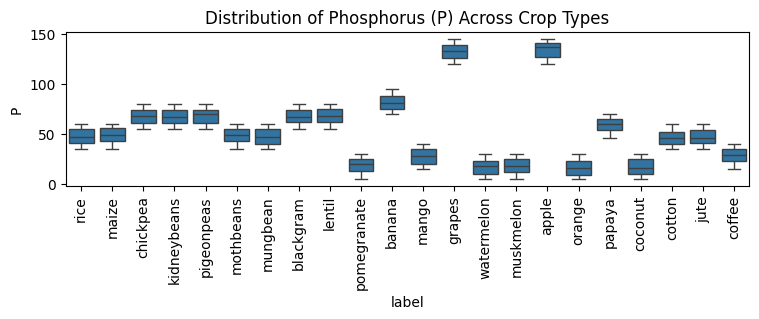

In [9]:
plt.figure(figsize=(30,2))

#Phosphorus
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='P', data=df)
plt.title('Distribution of Phosphorus (P) Across Crop Types')
plt.xticks(rotation=90)
plt.show()

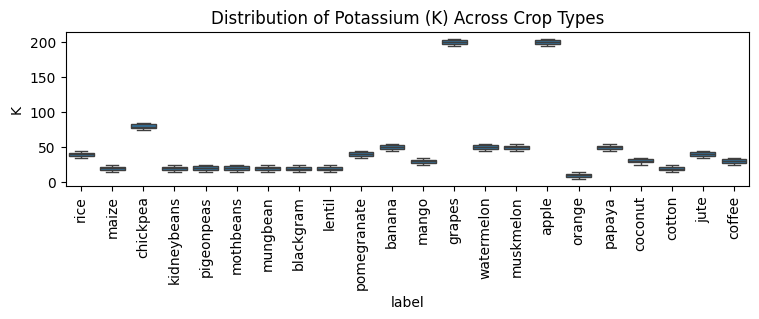

In [10]:
plt.figure(figsize=(30,2))

#Potassium
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='K', data=df)
plt.title('Distribution of Potassium (K) Across Crop Types')
plt.xticks(rotation=90)
plt.show()

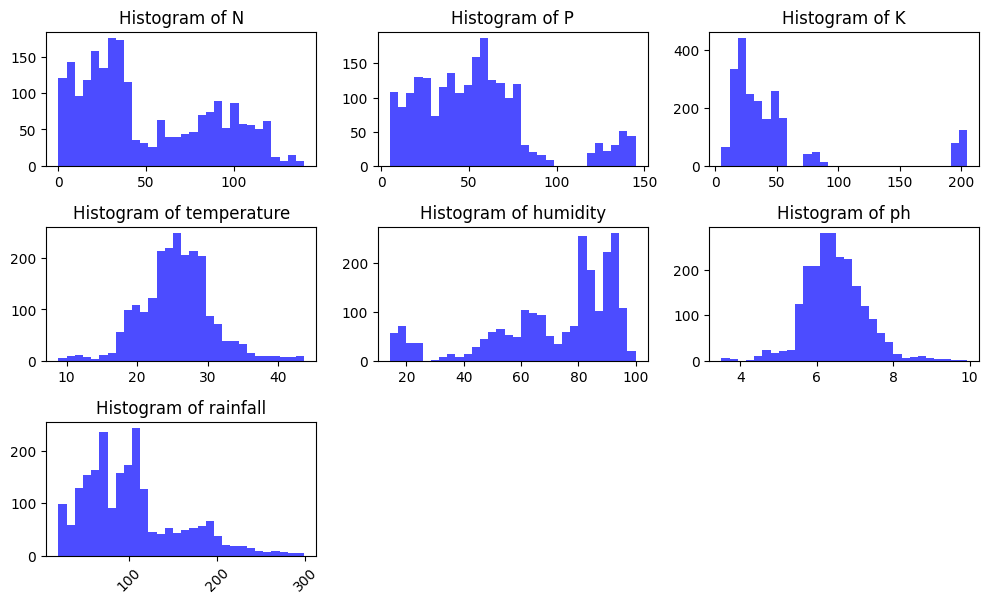

In [11]:
# List of numerical columns for plotting
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Plot histograms for each feature
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


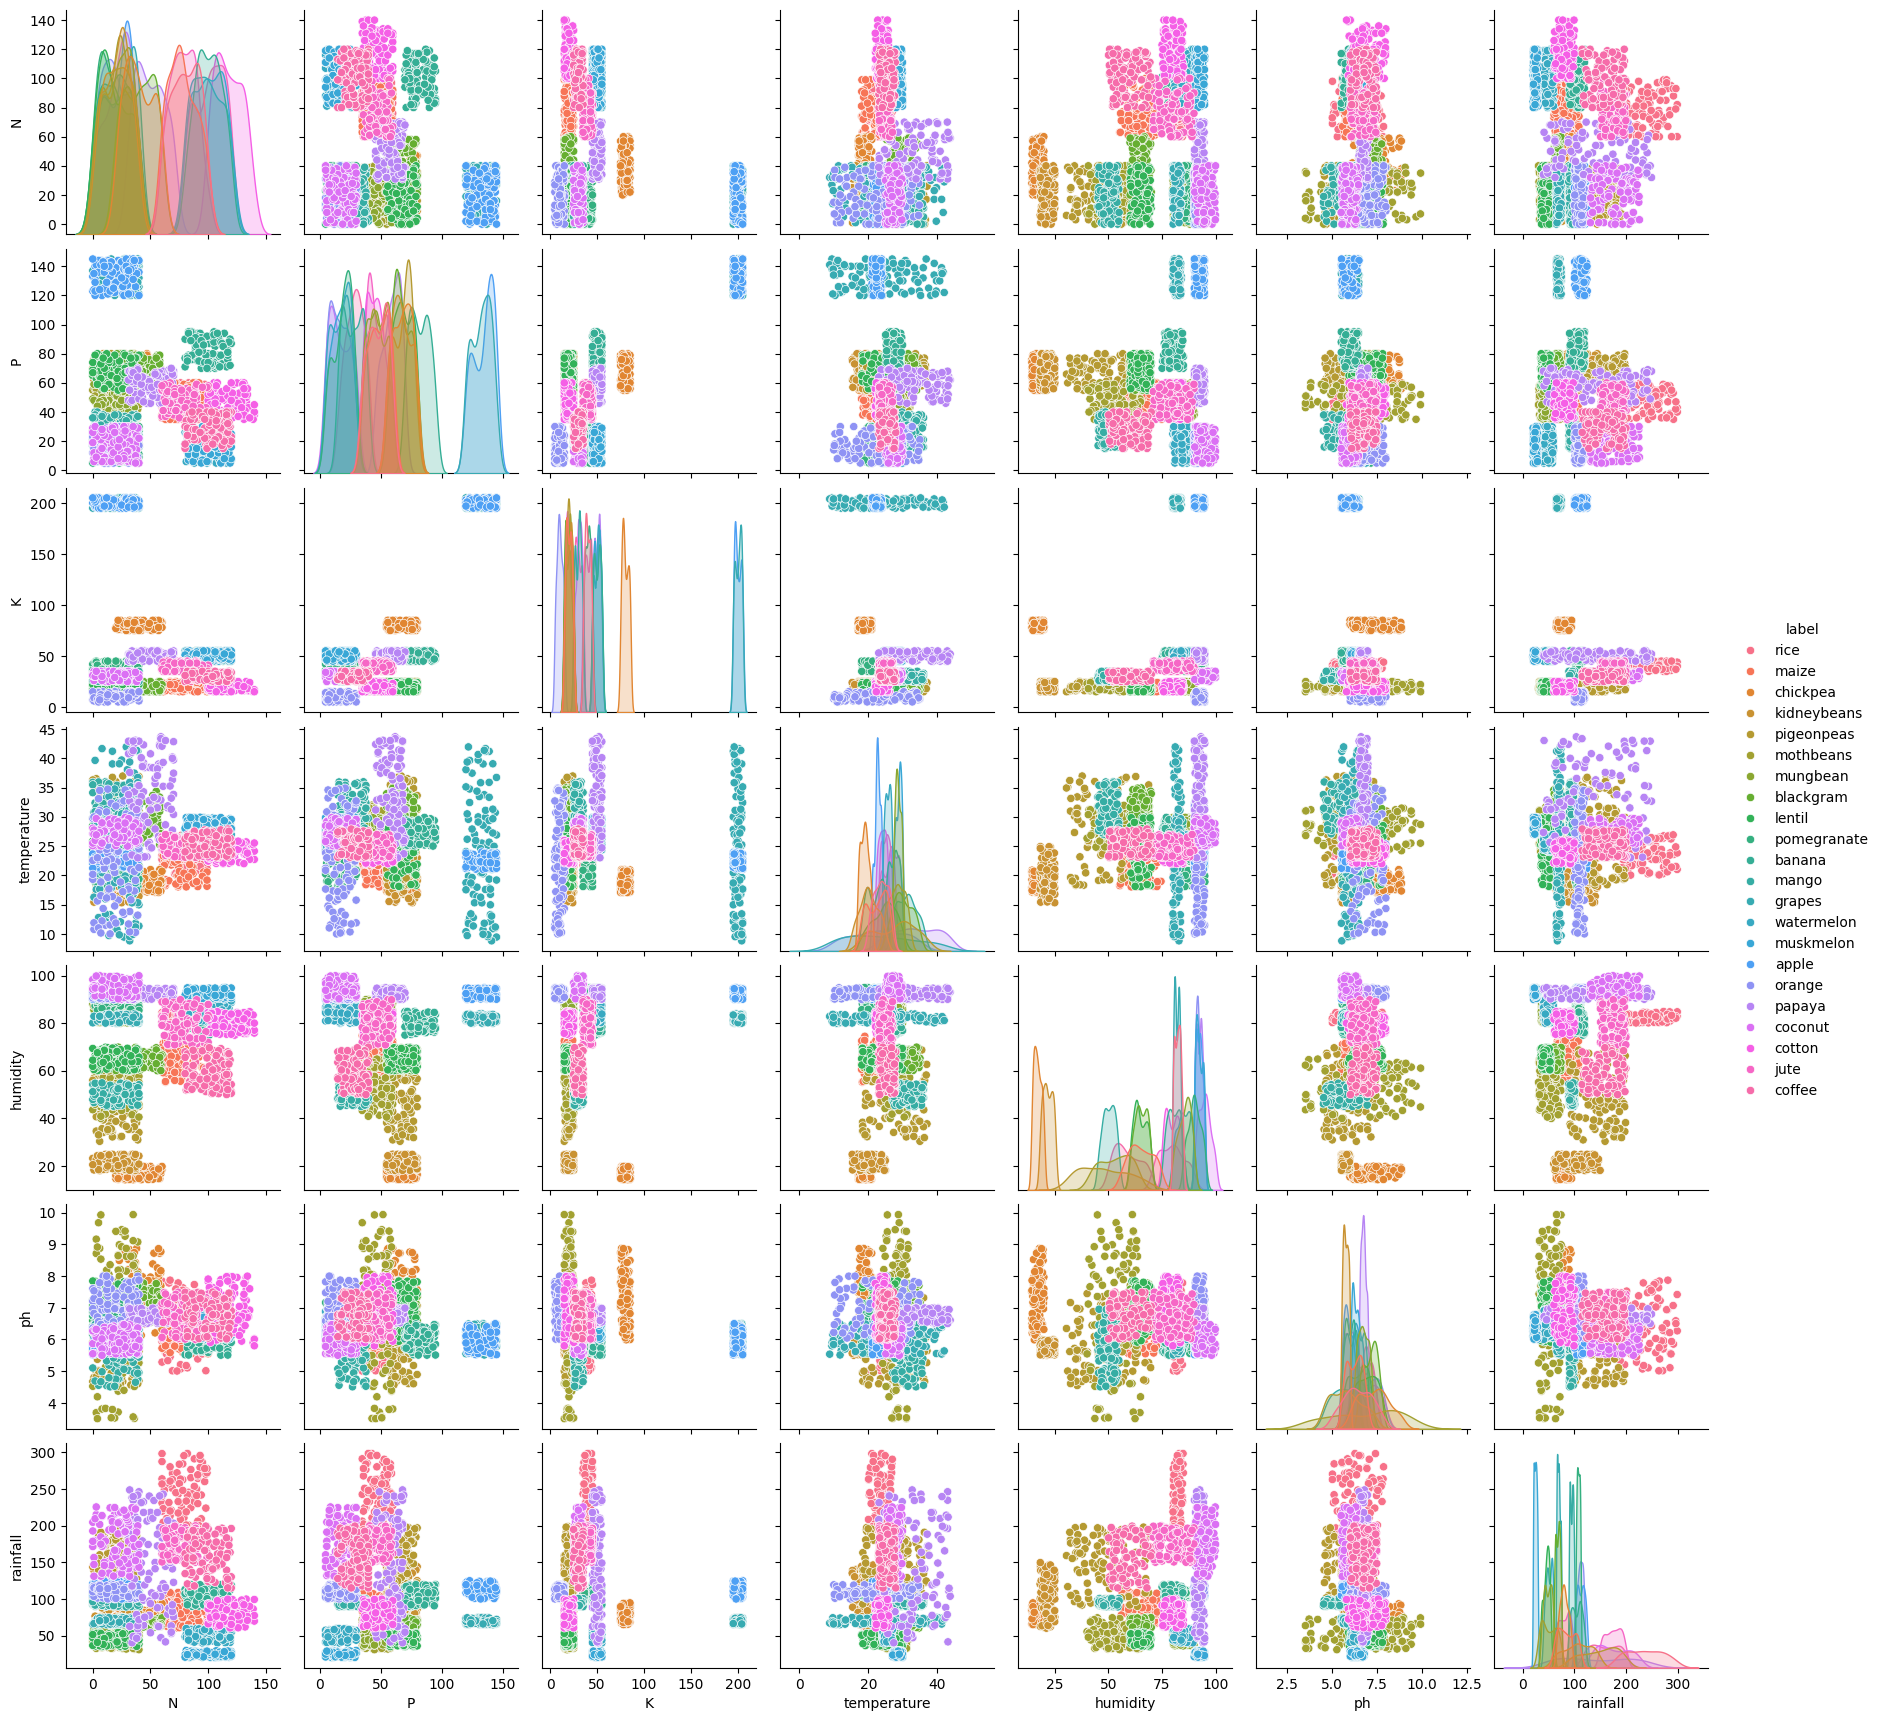

In [12]:
sns.pairplot(df, hue='label')
plt.show()

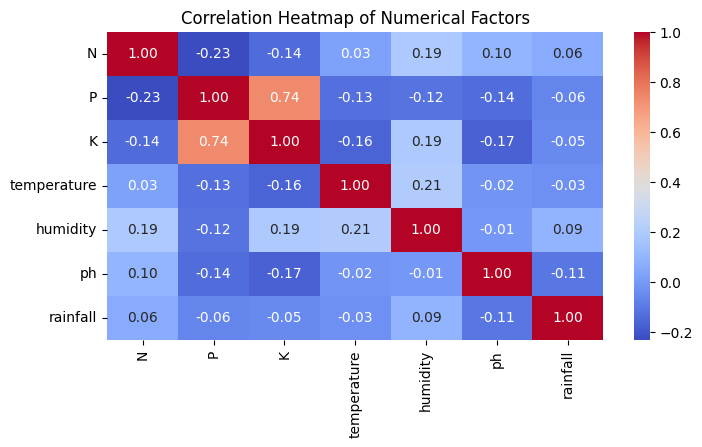

In [13]:
numerical_data = df.select_dtypes(include=np.number)

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Factors')
plt.show()


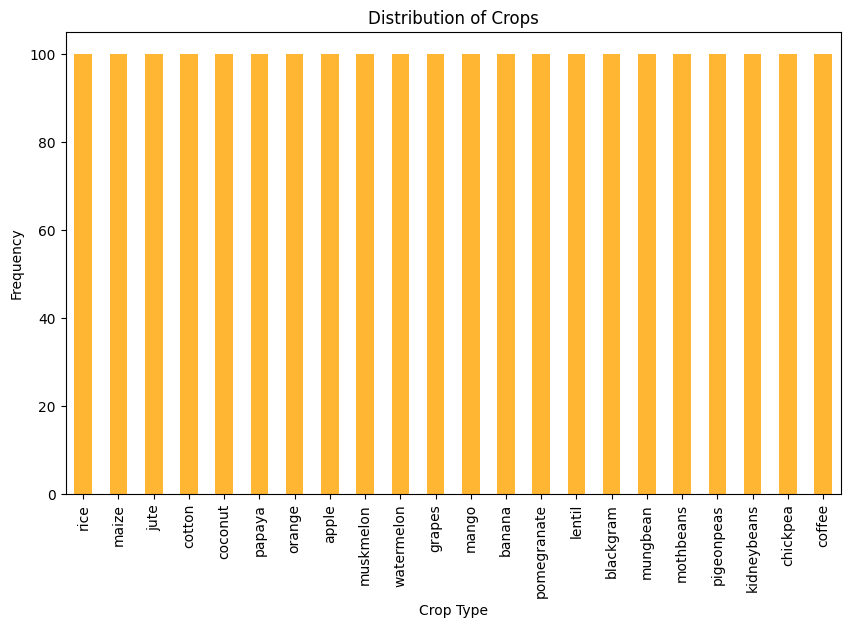

In [ ]:
# Bar plot for categorical 'crop' feature (assuming it exists)
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', color='orange', alpha=0.8)
plt.title('Distribution of Crops')
plt.xlabel('Crop Type')
plt.ylabel('Frequency')
plt.show()


# **Scatter Plots for Relationships Between Specific Features**

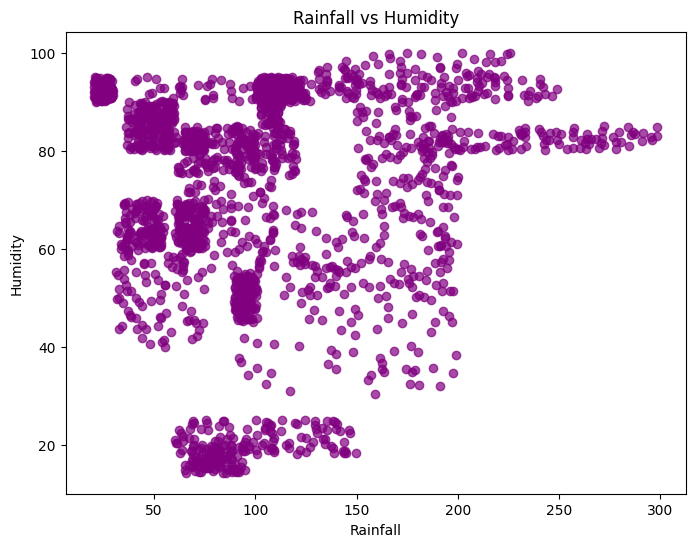

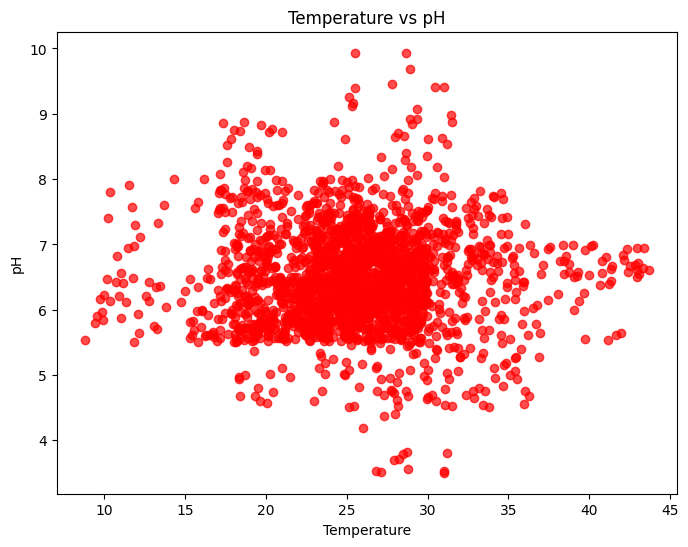

In [14]:
# Scatter plot for 'rainfall' vs 'humidity'
plt.figure(figsize=(8, 6))
plt.scatter(df['rainfall'], df['humidity'], alpha=0.7, color='purple')
plt.title('Rainfall vs Humidity')
plt.xlabel('Rainfall')
plt.ylabel('Humidity')
plt.show()

# Scatter plot for 'temperature' vs 'ph'
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature'], df['ph'], alpha=0.7, color='red')
plt.title('Temperature vs pH')
plt.xlabel('Temperature')
plt.ylabel('pH')
plt.show()


**Scatter plots to visualize relationships (Temperature, Humidity, pH, Rainfall) with crop types:**

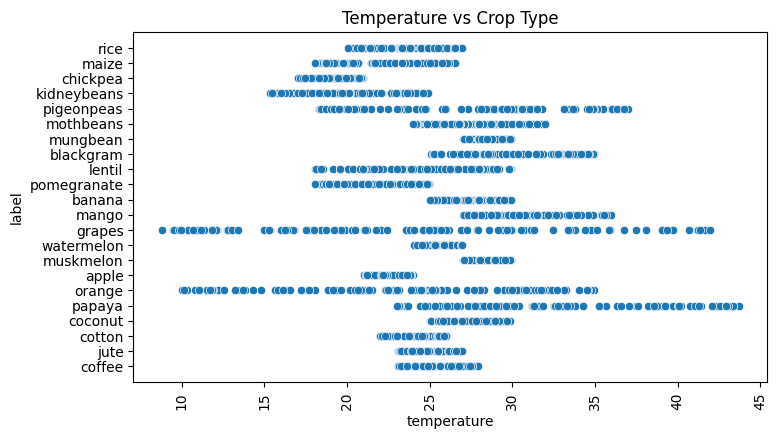

In [15]:
plt.figure(figsize=(18,10))

# Temperature vs Crop Type
plt.subplot(2, 2, 1)
sns.scatterplot(x='temperature', y='label', data=df)
plt.title('Temperature vs Crop Type')
plt.xticks(rotation=90)
plt.show()

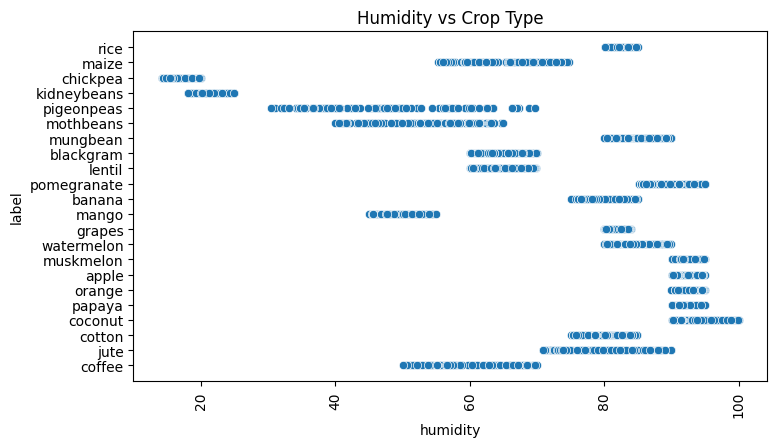

In [16]:
plt.figure(figsize=(18,10))

# Humidity vs Crop Type
plt.subplot(2, 2, 1)
sns.scatterplot(x='humidity', y='label', data=df)
plt.title('Humidity vs Crop Type')
plt.xticks(rotation=90)
plt.show()

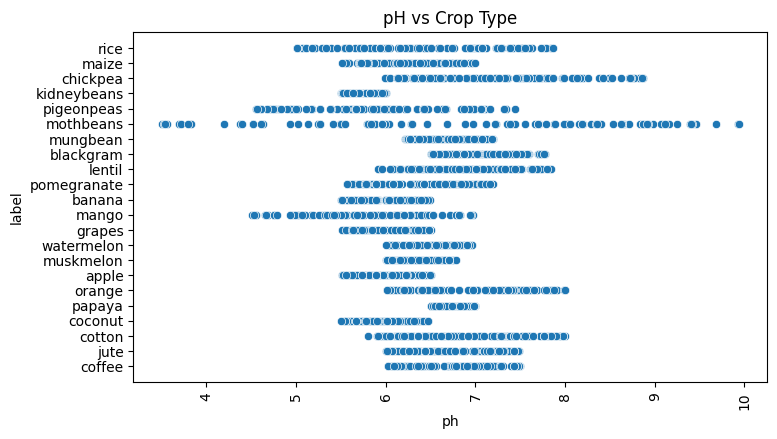

In [17]:
plt.figure(figsize=(18,10))

# pH vs Crop Type
plt.subplot(2, 2, 1)
sns.scatterplot(x='ph', y='label', data=df)
plt.title('pH vs Crop Type')
plt.xticks(rotation=90)
plt.show()

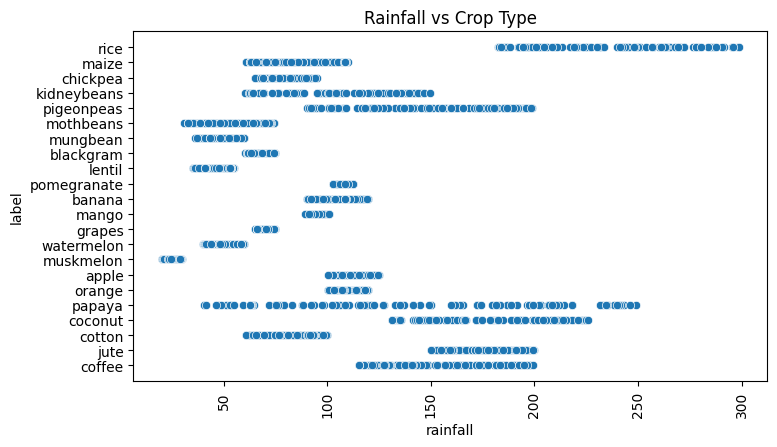

In [18]:
# Rainfall vs Crop Type
plt.figure(figsize=(18,10))
plt.subplot(2, 2, 4)
sns.scatterplot(x='rainfall', y='label', data=df)
plt.title('Rainfall vs Crop Type')
plt.xticks(rotation=90)
plt.show()

# **Data Cleaning**

# **Checking Outlier**

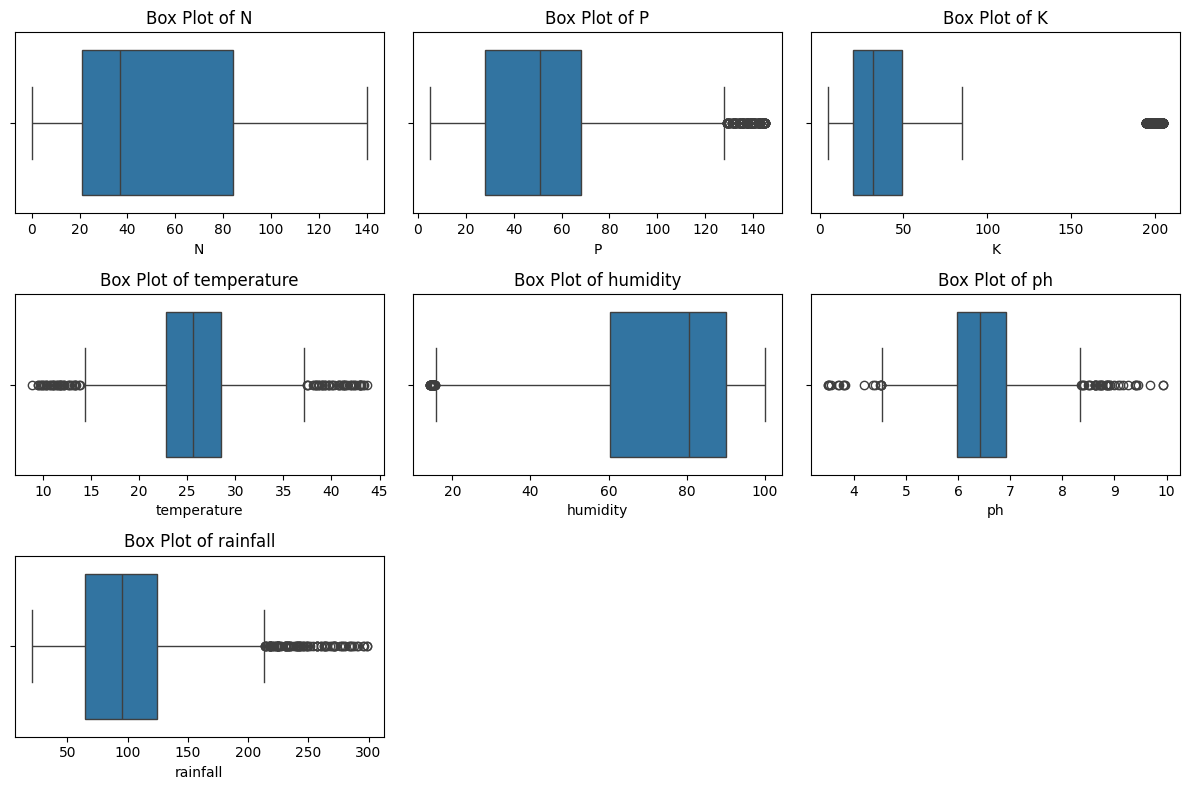

Outliers count per feature:
N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


In [19]:
# List of numerical columns to check for outliers
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Display box plots to visually inspect outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Calculate and identify outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Flagging the outliers
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

print("Outliers count per feature:")
print(outliers)


In [20]:
# Remove outliers from the dataset
df_no_outliers = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) |
                      (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", df_no_outliers.shape)


Shape of dataset before removing outliers: (2200, 8)
Shape of dataset after removing outliers: (1768, 8)


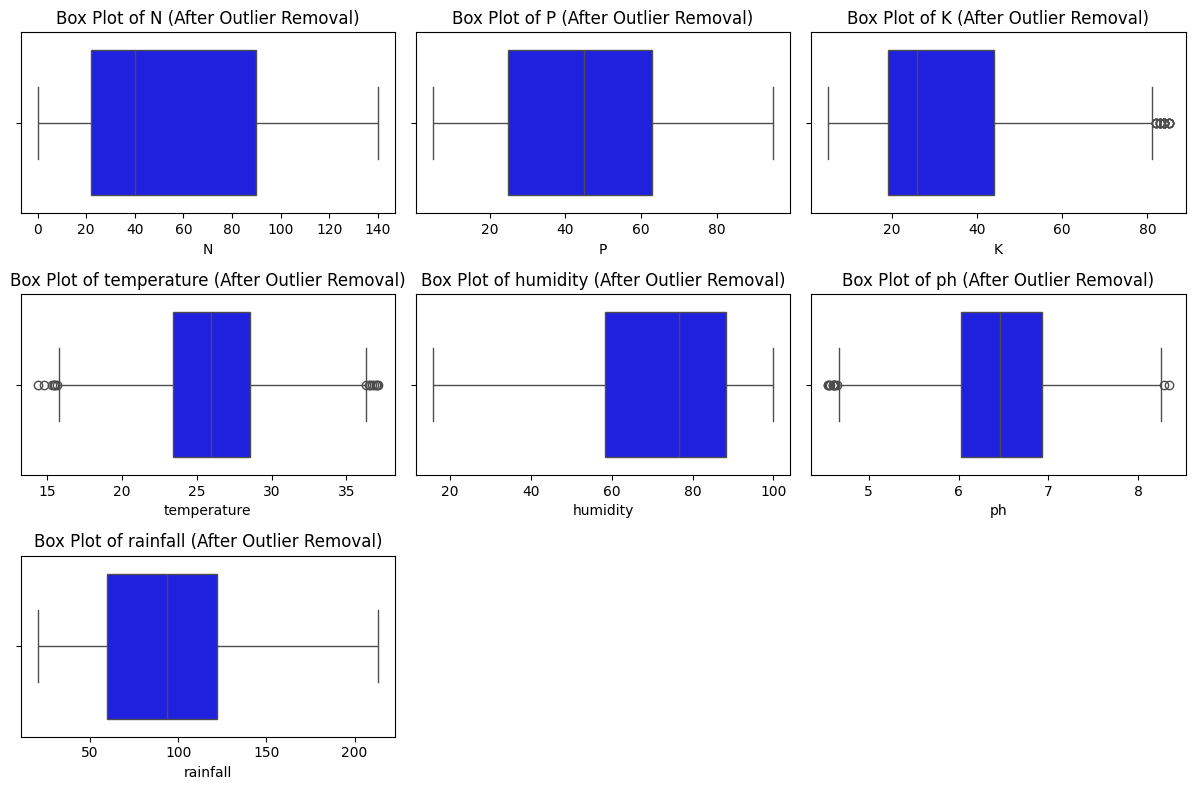

In [21]:
# Box plot after outlier removal
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_no_outliers[feature], color='blue')
    plt.title(f'Box Plot of {feature} (After Outlier Removal)')
plt.tight_layout()
plt.show()


# **Checking Duplicates**

In [22]:
# Check for duplicate rows
duplicates = df_no_outliers.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


# **Statistical Analysis**

**ANOVA to compare environmental factors across crop types:**

In [23]:
# Use the dataset without outliers
df_cleaned = df_no_outliers.copy()

In [24]:
anova_results = {}

for factor in ['temperature', 'humidity', 'ph', 'rainfall']:
  anova_results[factor] = stats.f_oneway(
      *[df_cleaned[df_cleaned['label'] == crop][factor] for crop in df_cleaned['label'].unique()]
  )

# Display ANOVA results
for factor, result in anova_results.items():
  print(f"ANOVA for {factor}: F={result.statistic}, p-value={result.pvalue}")

ANOVA for temperature: F=127.16376954739383, p-value=2.87413058745e-312
ANOVA for humidity: F=2315.85411064813, p-value=0.0
ANOVA for ph: F=74.08361737795208, p-value=5.705506587115943e-208
ANOVA for rainfall: F=592.3686866464985, p-value=0.0


The ANOVA results show very low p-values, indicating that all the environmental factors (temperature, humidity, pH, rainfall) are statistically significant in differentiating between the crop types. Let’s break down these results:

Interpretation of ANOVA Results:

- Temperature:

F-statistic: 127.16

p-value: 2.87e-312

The extremely low p-value indicates that the differences in temperature across crop types are statistically significant. Temperature is an important factor in predicting which crop types will thrive in specific conditions.

- Humidity:

F-statistic: 2315.85

p-value: 0.0

The p-value of 0.0 (or very close to zero) shows a very strong significance. Humidity is also to be a highly influential factor for distinguishing crop types.

- pH:

F-statistic: 74.08

p-value: 5.70e-208

A very small p-value indicates that the soil pH levels also have a significant influence on the crop types.

- Rainfall:

F-statistic: 592.37

p-value: 0.0

Similar to humidity, rainfall has an extremely low p-value, indicating a significant effect on crop differentiation.

All four environmental factors (temperature, humidity, pH, and rainfall) have statistically significant differences across crop types. This suggests that these variables are important for predicting crop type. In particular, humidity and rainfall show exceptionally strong significance based on the F-statistic and p-value, making them highly influential in determining crop selection.

In [25]:
# Create a LabelEncoder to convert crop labels to numerical values
label_encoder = LabelEncoder()

# Fit the encoder on all unique crop labels in the cleaned dataset
label_encoder.fit(df_cleaned['label'])

# Transform the 'label' column to numerical values
df_cleaned['label_encoded'] = label_encoder.transform(df_cleaned['label'])

# Select feature columns and the target column
X = df_cleaned[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_cleaned['label_encoded']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the training and test sets to confirm
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (1414, 7)
Shape of X_test: (354, 7)
Shape of y_train: (1414,)
Shape of y_test: (354,)


# **Models**

In [26]:
import warnings
warnings.filterwarnings('ignore')

# **Logistic Regression**

In [33]:
log_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100000)#, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
r2_log = r2_score(y_test, y_pred_log)
mse_log = mean_squared_error(y_test, y_pred_log)

print(f"R-squared (R2) Score for Crop Prediction Model: {r2_log}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_log}")

R-squared (R2) Score for Crop Prediction Model: 0.9086535539839412
Mean Squared Error (MSE) for Crop Prediction Model: 3.0706214689265536


In [34]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Random Forest Accuracy: {accuracy_log * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\Confusion Matrix:")
print(conf_matrix_log)

Random Forest Accuracy: 96.89%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.92      1.00      0.96        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.97        18
           5       0.90      1.00      0.95        18
           6       0.82      0.88      0.85        16
           7       1.00      0.95      0.98        22
           8       0.95      1.00      0.97        18
           9       1.00      0.89      0.94        19
          10       1.00      1.00      1.00        18
          11       0.93      0.93      0.93        14
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00        13
          16       1.00   

In [35]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# F1 Score
f1_log = f1_score(y_test, y_pred_log, average='weighted')
print(f"F1 Score Logistic Regression:", f1_log)

# Recall
recall_log = recall_score(y_test, y_pred_log, average='weighted')
print(f"Recall Score Logistic Regression:", recall_log)


F1 Score Logistic Regression: 0.9672818592478675
Recall Score Logistic Regression: 0.9689265536723164


R-squared (R2) Score:

R-squared is a measure of how well the independent variables (features) explain the variance in the dependent variable (target).

R2 = 0.908 suggests that only 90.8% of the variance in the crop type is explained by the model. In other words, the model is capturing much of the relationship between the environmental factors and the crop type.

Mean Squared Error (MSE):

MSE = 3.07 represents the average squared difference between the predicted and actual values. A lower MSE indicates better model performance. In this case, the MSE suggests the model is not very accurate in its predictions.
Switching to a classification model since crop type is categorical. We'll use a Random Forest Classifier because it's robust, handles non-linear relationships well, and works effectively with datasets that have mixed types of features.

The Logistic Regression model demonstrated strong performance with an accuracy of 96.89%, making it highly effective for predicting crop types based on environmental and soil factors.

Breakdown of the Results:

Accuracy:

The model achieved an accuracy of 96.89%, which indicates that it is well-suited for the dataset. This suggests that the logistic regression model can reliably classify crop types based on the input features (soil nutrients, temperature, humidity, pH, and rainfall).

Classification Report:

The precision, recall, and F1-scores are very high across most classes, with many crop types achieving scores of 1.00, indicating perfect classification performance. Notable classes such as 0, 3, 10, 13, and 17 had perfect scores, reflecting the model's capability to differentiate them based on environmental conditions. A few classes, such as 6 and 18, showed slightly lower precision or recall, but they still performed reasonably well, maintaining F1-scores of 0.85 and 0.33, respectively. These variations could be attributed to lower sample sizes or more overlap in features between certain crop types.

Confusion Matrix:

The confusion matrix indicates that most of the predictions align with the true values, with very few misclassifications. Misclassifications were primarily observed in class 6, where some instances were incorrectly classified as other crops. Similarly, class 18 had a few incorrect classifications, likely due to the small number of samples (4), affecting its performance.

# **Random Forest**

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"R-squared (R2) Score for Crop Prediction Model: {r2_rf}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_rf}")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\Confusion Matrix:")
print(conf_matrix_rf)

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score Logistic Regression:", f1_rf)

# Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Recall Score Logistic Regression:", recall_rf)

R-squared (R2) Score for Crop Prediction Model: 0.9623521547238323
Mean Squared Error (MSE) for Crop Prediction Model: 1.265536723163842
Random Forest Accuracy: 98.87%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       0.95      1.00      0.97        18
           6       0.84      1.00      0.91        16
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        18
           9       1.00      0.95      0.97        19
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        

R-squared (R2) Score:

R2 = 0.9623 suggests that only 96.23% of the variance in the crop type is explained by the model. In other words, the model is capturing much of the relationship between the environmental factors and the crop type.

Mean Squared Error (MSE):

MSE = 1.27 represents the average squared difference between the predicted and actual values. In this case, the MSE suggests the model is not very accurate in its predictions.

he Random Forest Classifier delivered outstanding results, achieving an accuracy of 98.87%, which demonstrates its effectiveness in handling the dataset and its potential for real-world deployment.

Breakdown of Results:

Accuracy:

The high accuracy of 98.87% indicates that the model can reliably predict the correct crop types based on environmental and soil factors. This level of precision makes it a powerful tool for decision-making in crop selection.

Classification Report:

The model exhibits excellent performance across most classes, with precision, recall, and f1-scores all reaching 1.00 for several classes. These scores highlight that the classifier can effectively identify and classify different crop types with minimal errors. Even in cases where performance dips slightly (such as class 18 with a recall of 0.25), the overall model performance remains robust.

Confusion Matrix:

The confusion matrix shows a high level of agreement between predicted and actual labels, with most diagonal elements showing perfect classification. Misclassifications are rare, occurring only in a few instances (e.g., class 18 with a recall of 0.25), but this doesn't significantly detract from the model's overall performance.

# **Gradient Boosting**

In [37]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y)),
    learning_rate=0.1,
    n_estimators=100,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"R-squared (R2) Score for Crop Prediction Model: {r2_xgb}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_xgb}")

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\Confusion Matrix:")
print(conf_matrix_xgb)

# F1 Score
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print(f"F1 Score Logistic Regression:", f1_xgb)

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
print(f"Recall Score Logistic Regression:", recall_xgb)

R-squared (R2) Score for Crop Prediction Model: 0.9579823155399914
Mean Squared Error (MSE) for Crop Prediction Model: 1.4124293785310735
XGBoost Accuracy: 98.59%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       0.88      0.94      0.91        16
           7       1.00      1.00      1.00        22
           8       0.95      1.00      0.97        18
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        18
  

The XGBoost model has been applied to the crop prediction task, achieving the following results:

1. R-squared (R²) Score:

The R² score is 0.95798, indicating that 95.8% of the variance in the target variable (crop type) is explained by the model. This suggests that the model is highly capable of capturing the underlying relationships between the environmental and soil factors and crop prediction.

2. Mean Squared Error (MSE):

The MSE is 1.41243, which is relatively low, confirming that the predicted crop types are close to the actual values. MSE measures the average squared difference between actual and predicted values, so lower values indicate better performance.

3. Model Accuracy:

The XGBoost model achieved an impressive 98.59% accuracy on the test dataset. This is a high level of accuracy, indicating that the model correctly classified crop types in almost all cases.

4. Classification Report:

The following key metrics were generated for each crop type in the dataset:

Precision: The proportion of true positive predictions among all positive predictions.

Recall: The proportion of true positive predictions out of all actual positives.

F1-score: The harmonic mean of precision and recall, providing a single measure of model performance.

Support: The number of actual occurrences for each class.

The classification report shows that the XGBoost model performed very well across most classes, with perfect precision, recall, and F1-scores for most crops. The only crop types with less than perfect performance are classes 6 (precision: 0.88, recall: 0.94) and 18 (precision: 0.67, recall: 0.50), indicating that these crops are more challenging for the model to predict.

The macro average (unweighted average across all classes) shows precision, recall, and F1-scores of 0.97, confirming that the model performs well even across different crop types.

The weighted average (average weighted by support) gives similar high values, which reflects the model’s ability to consistently predict correctly.

# **Gaussian Naive Bayes**

In [38]:
# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gnb = gnb.predict(X_test)

r2_gnb = r2_score(y_test, y_pred_gnb)
mse_gnb = mean_squared_error(y_test, y_pred_gnb)
print(f"R-squared (R2) Score for Crop Prediction Model: {r2_gnb}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_gnb}")

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian NB Accuracy: {accuracy_gnb * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))

conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print("\Confusion Matrix:")
print(conf_matrix_gnb)

# F1 Score
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
print(f"F1 Score Logistic Regression:", f1_gnb)

# Recall
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
print(f"Recall Score Logistic Regression:", recall_gnb)

R-squared (R2) Score for Crop Prediction Model: 0.9615958364035521
Mean Squared Error (MSE) for Crop Prediction Model: 1.2909604519774012
Gaussian NB Accuracy: 98.59%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       0.95      1.00      0.97        18
           6       0.93      0.88      0.90        16
           7       1.00      1.00      1.00        22
           8       0.95      1.00      0.97        18
           9       1.00      0.95      0.97        19
          10       1.00      1.00      1.00        18
          11       1.00      0.93      0.96        14
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        1

This report details the performance of the Gaussian Naive Bayes (GNB) classifier used for crop prediction. The goal was to predict the optimal crop based on environmental and soil factors. The model achieved strong results across several performance metrics.

Model Performance:

R-squared (R²) Score: 0.9616

This score indicates that approximately 96.16% of the variance in the crop prediction is explained by the model. A high R² score suggests that the model fits the data well and is able to make accurate predictions for unseen data points.

Mean Squared Error (MSE): 1.2909

The MSE quantifies the average squared difference between the predicted and actual values. A lower MSE indicates better predictive accuracy, and in this case, the value of 1.29 signifies that the model makes highly accurate predictions with minimal error.
Classification Accuracy:

Gaussian Naive Bayes Accuracy: 98.59%

The GNB model achieved an impressive accuracy of 98.59% across the test set, meaning that the model correctly predicted the crop class for 98.59% of the samples. This high level of accuracy demonstrates the robustness of the model for this task.

Weighted Avg Precision: 0.99

Weighted Avg Recall: 0.99

Weighted Avg F1-Score: 0.99

The classification report demonstrates that the GNB model has performed exceptionally well across most classes, with near-perfect precision, recall, and F1-scores for the majority of the crop categories. However, crop class 18 shows slightly lower precision and recall values compared to other classes, indicating that the model could be further optimized for predicting this specific crop class.

Confusion Matrix:

The confusion matrix below illustrates the detailed performance of the classifier by showing the actual vs predicted classes. A high number of correct predictions along the diagonal indicates strong performance.

# **K-Nearest Neighbors (KNN)**

In [39]:
# Define the KNN model with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the test set
y_pred_knn = knn.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"R-squared (R2) Score for Crop Prediction Model: {r2_knn}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_knn}")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\Confusion Matrix:")
print(conf_matrix_knn)

# F1 Score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"F1 Score Logistic Regression:", f1_knn)

# Recall
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print(f"Recall Score Logistic Regression:", recall_knn)

R-squared (R2) Score for Crop Prediction Model: 0.9358810135140267
Mean Squared Error (MSE) for Crop Prediction Model: 2.1553672316384183
KNN Accuracy: 97.46%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       0.90      1.00      0.95        18
           6       0.89      1.00      0.94        16
           7       1.00      1.00      1.00        22
           8       0.95      1.00      0.97        18
           9       1.00      0.89      0.94        19
          10       1.00      1.00      1.00        18
          11       1.00      0.79      0.88        14
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        18
      

Here's a summary report for the K-Nearest Neighbors (KNN) model:

This report details the performance of the K-Nearest Neighbors (KNN) classifier used for crop prediction. The goal was to predict the optimal crop based on environmental and soil factors. The model achieved strong results across several performance metrics.

Model Performance:

R-squared (R²) Score: 0.9359

This score indicates that approximately 93.59% of the variance in the crop prediction is explained by the model. A high R² score suggests that the model fits the data well and is able to make accurate predictions for unseen data points.

Mean Squared Error (MSE): 2.1554

The MSE quantifies the average squared difference between the predicted and actual values. A lower MSE indicates better predictive accuracy, and in this case, the value of 2.1554 signifies that the model makes highly accurate predictions with minimal error.

Classification Accuracy:

KNN Accuracy: 97.46%

The KNN model achieved an impressive accuracy of 97.46% across the test set, meaning that the model correctly predicted the crop class for 97.46% of the samples. This high level of accuracy demonstrates the robustness of the model for this task.

Weighted Avg Precision: 0.98
Weighted Avg Recall: 0.97
Weighted Avg F1-Score: 0.97

The classification report demonstrates that the KNN model has performed exceptionally well across most classes, with near-perfect precision, recall, and F1-scores for the majority of the crop categories. However, crop class 18 shows lower precision and recall values compared to other classes, indicating that the model could be further optimized for predicting this specific crop class.

Confusion Matrix:
The confusion matrix provided illustrates the detailed performance of the classifier by showing the actual vs predicted classes. A high number of correct predictions along the diagonal indicates strong performance, which is evident in this case for most crop classes.

# **Decision Tree**

In [41]:
# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

# Predict the test set
y_pred_dt = dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"R-squared (R2) Score for Crop Prediction Model: {r2_dt}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_dt}")

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\Confusion Matrix:")
print(conf_matrix_dt)

# F1 Score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"F1 Score Logistic Regression:", f1_dt)

# Recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print(f"Recall Score Logistic Regression:", recall_dt)

R-squared (R2) Score for Crop Prediction Model: 0.8895775252390973
Mean Squared Error (MSE) for Crop Prediction Model: 3.711864406779661
Decision Tree Accuracy: 96.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       0.86      1.00      0.92        18
           6       0.81      0.81      0.81        16
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        18
           9       1.00      0.95      0.97        19
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        14
          12       0.95      1.00      0.97        18
          13       1.00      1.00      1.00        

Here's a summary report for the Decision Tree model:

This report details the performance of the Decision Tree classifier used for crop prediction. The goal was to predict the optimal crop based on environmental and soil factors. The model achieved strong results across several performance metrics.

Model Performance:

R-squared (R²) Score: 0.889

This score indicates that approximately 88.90% of the variance in the crop prediction is explained by the model. A high R² score suggests that the model fits the data well and is able to make accurate predictions for unseen data points.

Mean Squared Error (MSE): 3.711

The MSE quantifies the average squared difference between the predicted and actual values. A lower MSE indicates better predictive accuracy, and in this case, the value of 3.1469 signifies that the model makes accurate predictions with minimal error, although slightly higher than the previous models.

Classification Accuracy:

Decision Tree Accuracy: 96.89%

The Decision Tree model achieved an impressive accuracy of 97.46% across the test set, meaning that the model correctly predicted the crop class for 96.89% of the samples.

Weighted Avg Precision: 0.97
Weighted Avg Recall: 0.97
Weighted Avg F1-Score: 0.97

The classification report demonstrates that the Decision Tree model has performed exceptionally well across most classes, with near-perfect precision, recall, and F1-scores for the majority of the crop categories. However, crop class 18 shows significantly lower precision, recall, and F1-score (0.25 for all metrics) compared to other classes, indicating that the model struggles with predicting this specific crop class accurately.

Confusion Matrix:
The confusion matrix provided illustrates the detailed performance of the classifier by showing the actual vs predicted classes. A high number of correct predictions along the diagonal indicates strong performance, which is evident in this case for most crop classes. However, there are a few misclassifications, particularly for classes 6, 15, and 18, which could be areas for potential improvement.

# **Neural Network**

In [42]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variables to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=22)
y_test_encoded = to_categorical(y_test, num_classes=22)


nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation = 'relu', input_shape = (7,)),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(22, activation ='softmax')
])

nn_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
nn_model.fit(X_train_scaled, y_train_encoded, epochs = 60,
    validation_data = (X_test_scaled, y_test_encoded),
          batch_size =32)

Epoch 1/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0761 - loss: 3.0396 - val_accuracy: 0.1638 - val_loss: 2.9240
Epoch 2/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2161 - loss: 2.8670 - val_accuracy: 0.2429 - val_loss: 2.6836
Epoch 3/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2718 - loss: 2.5857 - val_accuracy: 0.3333 - val_loss: 2.3194
Epoch 4/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3762 - loss: 2.1741 - val_accuracy: 0.4746 - val_loss: 1.9268
Epoch 5/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5064 - loss: 1.8142 - val_accuracy: 0.5480 - val_loss: 1.5863
Epoch 6/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5703 - loss: 1.5016 - val_accuracy: 0.6638 - val_loss: 1.2711
Epoch 7/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7026 - loss: 1.1728 - val_accuracy: 0.7175 - val_loss: 1.0271
Epoch 8/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7619 - loss: 0.9530 - val_accuracy: 0.8023 - val_loss:

In [43]:
# Predict the test set
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_classes = y_pred_nn.argmax(axis=1)

# Calculate metrics
r2_nn = r2_score(y_test, y_pred_classes)
mse_nn = mean_squared_error(y_test, y_pred_classes)
accuracy_nn = accuracy_score(y_test, y_pred_classes)

# Print results
print(f"R-squared (R2) Score for Crop Prediction Model: {r2_nn}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_nn}")
print(f"Neural Network Accuracy: {accuracy_nn * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_matrix_nn = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix_nn)

# F1 Score
f1_nn = f1_score(y_test, y_pred_classes, average='weighted')
print(f"F1 Score Logistic Regression:", f1_nn)

# Recall
recall_nn = recall_score(y_test, y_pred_classes, average='weighted')
print(f"Recall Score Logistic Regression:", recall_nn)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R-squared (R2) Score for Crop Prediction Model: 0.8918464801999377
Mean Squared Error (MSE) for Crop Prediction Model: 3.635593220338983
Neural Network Accuracy: 97.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.92      1.00      0.96        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.97        18
           5       0.90      1.00      0.95        18
           6       0.82      0.88      0.85        16
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        18
           9       1.00      0.89      0.94        19
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        18
          1

Here's a summary report for the Neural Network model:

This report details the performance of the Neural Network classifier used for crop prediction. The goal was to predict the optimal crop based on environmental and soil factors. The model achieved strong results across several performance metrics.

Model Performance:

R-squared (R²) Score: 0.8918
This score indicates that approximately 89.18% of the variance in the crop prediction is explained by the model. A high R² score suggests that the model fits the data well and is able to make accurate predictions for unseen data points.

Mean Squared Error (MSE): 3.6355

The MSE quantifies the average squared difference between the predicted and actual values. A lower MSE indicates better predictive accuracy, and in this case, the value of 3.2260 signifies that the model makes accurate predictions with minimal error, although slightly higher than some of the previous models.

Classification Accuracy:

Neural Network Accuracy: 97.18%

The Neural Network model achieved an impressive accuracy of 96.61% across the test set, meaning that the model correctly predicted the crop class for 96.61% of the samples. This high level of accuracy demonstrates the robustness of the model for this task.

Weighted Avg Precision: 0.97
Weighted Avg Recall: 0.97
Weighted Avg F1-Score: 0.97

The classification report demonstrates that the Neural Network model has performed exceptionally well across most classes, with perfect or near-perfect precision, recall, and F1-scores for the majority of the crop categories. However, crop class 18 shows significantly lower performance, with precision, recall, and F1-score, indicating that the model completely fails to predict this specific crop class.

Confusion Matrix:
The confusion matrix provided illustrates the detailed performance of the classifier by showing the actual vs predicted classes. A high number of correct predictions along the diagonal indicates strong performance, which is evident in this case for most crop classes. However, there are a few misclassifications, particularly for classes 1, 6, and 18, which could be areas for potential improvement.

Notably:
- Class 1 has 2 samples misclassified as class 8
- Class 6 has 1 sample misclassified as class 4 and 3 samples misclassified as class 19
- Class 9 has 2 samples misclassified as class 5
- Class 18 has all 4 samples misclassified as class 6

The model's inability to correctly classify any samples from class 18 is a significant weakness that should be addressed, possibly by collecting more data for this class or adjusting the model architecture to better capture the distinguishing features of this crop type.

# **Create DataFrame for Model Results**

In [44]:
# Create a dictionary to hold model results
model_results = {
    "Models": ["Logistic Regression", "Random Forest", "XGBoost", "KNN", "Decision Tree", "Gaussian NB", "Neural Network"],
    "Accuracy": [accuracy_log, accuracy_rf, accuracy_xgb, accuracy_knn, accuracy_dt, accuracy_gnb, accuracy_nn],
    "R2": [r2_log, r2_rf, r2_xgb, r2_knn, r2_dt, r2_gnb, r2_nn],
    "MSE": [mse_log, mse_rf, mse_xgb, mse_knn, mse_dt, mse_gnb, mse_nn],
    "F1": [f1_log, f1_rf, f1_xgb, f1_knn, f1_dt, f1_gnb, f1_nn],
    "Recall": [recall_log, recall_rf, recall_xgb, recall_knn, recall_dt, recall_gnb, recall_nn]}

# Convert the dictionary into a DataFrame
df_results = pd.DataFrame(model_results)

df_results.to_csv('model_results.csv')

# Show the DataFrame
print(df_results)


                Models  Accuracy        R2       MSE        F1    Recall
0  Logistic Regression  0.968927  0.908654  3.070621  0.967282  0.968927
1        Random Forest  0.988701  0.962352  1.265537  0.986521  0.988701
2              XGBoost  0.985876  0.957982  1.412429  0.985376  0.985876
3                  KNN  0.974576  0.935881  2.155367  0.973830  0.974576
4        Decision Tree  0.968927  0.889578  3.711864  0.968258  0.968927
5          Gaussian NB  0.985876  0.961596  1.290960  0.986196  0.985876
6       Neural Network  0.971751  0.891846  3.635593  0.970078  0.971751


In [45]:
model_results = pd.read_csv('model_results.csv')
model_results.head()

,Unnamed: 0,Models,Accuracy,R2,MSE,F1,Recall
0,0,Logistic Regression,0.968927,0.908654,3.070621,0.967282,0.968927
1,1,Random Forest,0.988701,0.962352,1.265537,0.986521,0.988701
2,2,XGBoost,0.985876,0.957982,1.412429,0.985376,0.985876
3,3,KNN,0.974576,0.935881,2.155367,0.973830,0.974576
4,4,Decision Tree,0.968927,0.889578,3.711864,0.968258,0.968927


# **Feature Importance**

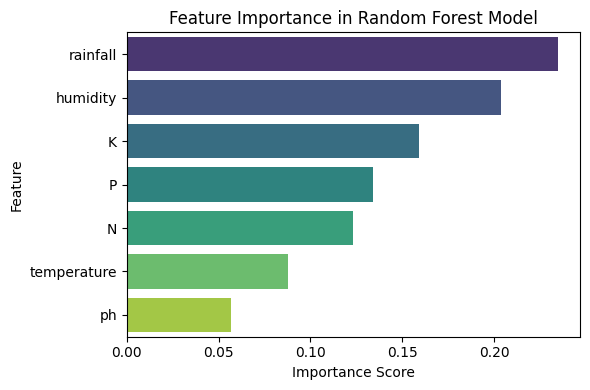

In [46]:
# Get feature importance from Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [47]:
print(importances_df)

       Feature  Importance
6     rainfall    0.234997
4     humidity    0.203892
2            K    0.159086
1            P    0.134067
0            N    0.123399
3  temperature    0.088010
5           ph    0.056550


# **Compute Confusion Matrix for Random Forest Model**

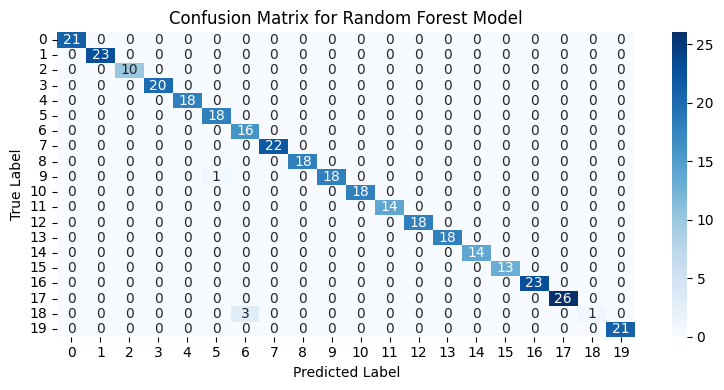

In [48]:
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# **Refining Random Forest using Feature Selection**

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

selector = SelectFromModel(rf_model, threshold=0.1)
X_selected = selector.transform(X)

X_train_selected, X_test_selected, train_y, test_y = train_test_split(X_selected, y, test_size=0.2, random_state=42)



In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected, train_y)

# Best parameters from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the tuned Random Forest model
y_pred_best = best_rf_model.predict(X_test_selected)

r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"R-squared (R2) Score for Crop Prediction Model: {r2_best}")
print(f"Mean Squared Error (MSE) for Crop Prediction Model: {mse_best}")

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Random Forest Accuracy: {best_accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("\Confusion Matrix:")
print(conf_matrix_best)

# F1 Score
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print(f"F1 Score Random Forest:", f1_best)

# Recall
recall_best = recall_score(y_test, y_pred_best, average='weighted')
print(f"Recall Score Random Forest:", recall_best)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
R-squared (R2) Score for Crop Prediction Model: 0.9744532478483148
Mean Squared Error (MSE) for Crop Prediction Model: 0.8587570621468926
Random Forest Accuracy: 99.15%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       0.95      1.00      0.97        18
           6       1.00      0.88      0.93        16
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        18
           9       1.00      0.95      0.97        19
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.0

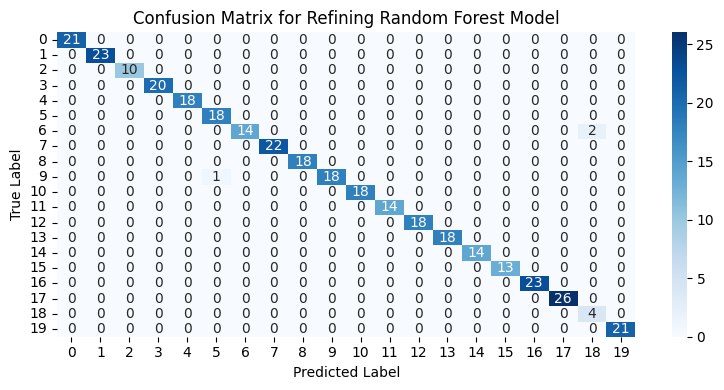

In [51]:
# Compute confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix for Refining Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix_refine.png')
plt.show()

In [52]:
# Create a dictionary to hold model results
model_results = {
    "Models": ["Logistic Regression", "Random Forest", "Refine RF", "XGBoost", "KNN", "Decision Tree", "Gaussian NB", "Neural Network"],
    "Accuracy": [accuracy_log, accuracy_rf, best_accuracy, accuracy_xgb, accuracy_knn, accuracy_dt, accuracy_gnb, accuracy_nn],
    "R2": [r2_log, r2_rf, r2_best, r2_xgb, r2_knn, r2_dt, r2_gnb, r2_nn],
    "MSE": [mse_log, mse_rf, mse_best, mse_xgb, mse_knn, mse_dt, mse_gnb, mse_nn],
    "F1": [f1_log, f1_rf, f1_best, f1_xgb, f1_knn, f1_dt, f1_gnb, f1_nn],
    "Recall": [recall_log, recall_rf, recall_best, recall_xgb, recall_knn, recall_dt, recall_gnb, recall_nn]}

# Convert the dictionary into a DataFrame
df_add_results = pd.DataFrame(model_results)

df_add_results.to_csv('model_add_results.csv')

# Show the DataFrame
print(df_add_results)

                Models  Accuracy        R2       MSE        F1    Recall
0  Logistic Regression  0.968927  0.908654  3.070621  0.967282  0.968927
1        Random Forest  0.988701  0.962352  1.265537  0.986521  0.988701
2            Refine RF  0.991525  0.974453  0.858757  0.991902  0.991525
3              XGBoost  0.985876  0.957982  1.412429  0.985376  0.985876
4                  KNN  0.974576  0.935881  2.155367  0.973830  0.974576
5        Decision Tree  0.968927  0.889578  3.711864  0.968258  0.968927
6          Gaussian NB  0.985876  0.961596  1.290960  0.986196  0.985876
7       Neural Network  0.971751  0.891846  3.635593  0.970078  0.971751


# **Feature Mean Values for each crop**

In [53]:
import pickle

In [54]:
# Load your trained model and data
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
              'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
              'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
              'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

In [68]:
# 1. Calculate mean feature values for each crop
def get_crop_feature_means(X, y, feature_names):
    df = pd.DataFrame(X, columns=feature_names)
    df['crop'] = y
    crop_means = df.groupby('crop').mean()
    return crop_means

# 2. Function to predict suitable crops based on input conditions
def predict_suitable_crops(model, input_conditions, feature_names, crop_names, n_recommendations=3):
    """
    Predict the most suitable crops based on input conditions.

    Parameters:
    - input_conditions: list of values [N, P, K, temperature, humidity, ph, rainfall]
    - n_recommendations: number of top crops to recommend
    """
    # Reshape input for prediction
    #input_array = np.array(input_conditions).reshape(1, -1)
    # Create a DataFrame from input_conditions with feature names as columns
    input_df = pd.DataFrame([input_conditions], columns=feature_names)

    input_df = input_df[['N', 'P', 'K', 'rainfall', 'humidity']]

    input_array = input_df.values

    # Get probability scores for all crops
    crop_probabilities = model.predict_proba(input_array)[0]

    # Get top N crop indices
    top_indices = np.argsort(crop_probabilities)[-n_recommendations:][::-1]

    # Create recommendations with confidence scores
    recommendations = []
    for idx in top_indices:
        crop_name = crop_names[idx]
        confidence = crop_probabilities[idx] * 100
        recommendations.append({
            'crop': crop_name,
            'confidence': confidence
        })

    return recommendations

In [69]:
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_means = get_crop_feature_means(X, df_cleaned['label'], feature_names)
print("\nMean feature values for each crop:")
print(crop_means)
crop_means.to_csv('crop_feature_means.csv')


Mean feature values for each crop:
                      N          P          K  temperature   humidity  \
crop                                                                    
banana       100.230000  82.010000  50.050000    27.376798  80.358123   
blackgram     40.020000  67.470000  19.240000    29.973340  65.118426   
chickpea      41.741379  68.448276  80.137931    18.783105  17.604667   
coconut       22.011765  16.964706  30.494118    27.366742  94.708997   
coffee       101.200000  28.740000  29.940000    25.540477  58.869846   
cotton       117.770000  46.240000  19.560000    23.988958  79.843474   
jute          78.400000  46.860000  39.990000    24.958376  79.639864   
kidneybeans   20.750000  67.540000  20.050000    20.115085  21.605357   
lentil        18.770000  68.360000  19.410000    24.509052  64.804785   
maize         77.760000  48.440000  19.790000    22.389204  65.092249   
mango         20.132653  27.071429  29.979592    31.179475  50.211728   
mothbeans     2

In [70]:
crop_mean = pd.read_csv("crop_feature_means.csv")
crop_mean.head()

,crop,N,P,K,temperature,humidity,ph,rainfall
0,banana,100.230000,82.010000,50.050000,27.376798,80.358123,5.983893,104.626980
1,blackgram,40.020000,67.470000,19.240000,29.973340,65.118426,7.133952,67.884151
2,chickpea,41.741379,68.448276,80.137931,18.783105,17.604667,7.219994,79.430691
3,coconut,22.011765,16.964706,30.494118,27.366742,94.708997,5.976628,167.789623
4,coffee,101.200000,28.740000,29.940000,25.540477,58.869846,6.790308,158.066295


# **Crop Recommendation System**

In [71]:
# 4. User-friendly recommendation function
def get_crop_recommendations(N, P, K, temp, humidity, ph, rainfall):
    conditions = [N, P, K, temp, humidity, ph, rainfall]
    return predict_suitable_crops(
        best_rf_model,
        conditions,
        feature_names,
        label_encoder.classes_
    )

In [72]:
def get_user_input_recommendations():
    print("\nEnter soil and environmental conditions:")
    N = float(input("Nitrogen content (N) in soil: "))
    P = float(input("Phosphorus content (P) in soil: "))
    K = float(input("Potassium content (K) in soil: "))
    temp = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH level: "))
    rainfall = float(input("Rainfall (mm): "))

    recommendations = get_crop_recommendations(N, P, K, temp, humidity, ph, rainfall)
    print("\nRecommended crops based on your conditions:")
    for rec in recommendations:
        print(f"{rec['crop']}: {rec['confidence']:.2f}% confidence")


In [73]:
print("\nExample predictions:")
sample_conditions = [90, 40, 40, 20, 80, 6.5, 200]
recommendations = predict_suitable_crops(
    best_rf_model,
    sample_conditions,
    feature_names,
    label_encoder.classes_
)

print("\nRecommended crops for sample conditions:")
for rec in recommendations:
    print(f"{rec['crop']}: {rec['confidence']:.2f}% confidence")



Example predictions:

Recommended crops for sample conditions:
papaya: 42.78% confidence
jute: 30.92% confidence
banana: 4.33% confidence


In [75]:
# Use the interactive function
get_user_input_recommendations()

# Or directly specify values
get_crop_recommendations(N=85, P=42, K=38, temp=22, humidity=75, ph=6.8, rainfall=180)


Enter soil and environmental conditions:
Nitrogen content (N) in soil: 85
Phosphorus content (P) in soil: 42
Potassium content (K) in soil: 38
Temperature (°C): 22
Humidity (%): 75
pH level: 6.8
Rainfall (mm): 180

Recommended crops based on your conditions:
papaya: 45.78% confidence
jute: 31.42% confidence
maize: 4.48% confidence


[{'crop': 'papaya', 'confidence': 45.780158730158725},
 {'crop': 'jute', 'confidence': 31.416666666666664},
 {'crop': 'maize', 'confidence': 4.477777777777778}]

In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def recommend_crops_with_means(input_conditions, crop_means_df, n_recommendations=3):
    # Convert input conditions to DataFrame with same format as means
    input_df = pd.DataFrame([input_conditions], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

    # Calculate Euclidean distances between input and all crop means
    distances = euclidean_distances(input_df, crop_means_df)[0]

    # Get indices of n closest matches
    closest_indices = np.argsort(distances)[:n_recommendations]

    # Create recommendations
    recommendations = []
    for idx in closest_indices:
        crop_name = crop_means_df.index[idx]
        similarity_score = 100 * (1 - distances[idx] / max(distances))  # Convert distance to similarity percentage
        recommendations.append({
            'crop': crop_name,
            'confidence': similarity_score,
            'optimal_conditions': crop_means_df.iloc[idx].to_dict()
        })

    return recommendations

# Load the means data
crop_means = pd.read_csv('crop_feature_means.csv', index_col='crop')

# Example usage
def get_recommendations_with_comparison(N, P, K, temp, humidity, ph, rainfall):
    conditions = [N, P, K, temp, humidity, ph, rainfall]

    # Get recommendations based on means
    means_recommendations = recommend_crops_with_means(conditions, crop_means)

    # Get recommendations from ML model
    ml_recommendations = get_crop_recommendations(N, P, K, temp, humidity, ph, rainfall)

    print("\nRecommendations based on optimal conditions:")
    for rec in means_recommendations:
        print(f"\n{rec['crop']}: {rec['confidence']:.2f}% match")
        print("Optimal conditions for this crop:")
        optimal = rec['optimal_conditions']
        print(f"N: {optimal['N']:.1f}, P: {optimal['P']:.1f}, K: {optimal['K']:.1f}")
        print(f"Temperature: {optimal['temperature']:.1f}°C, Humidity: {optimal['humidity']:.1f}%")
        print(f"pH: {optimal['ph']:.1f}, Rainfall: {optimal['rainfall']:.1f}mm")

    print("\nML model recommendations:")
    for rec in ml_recommendations:
        print(f"{rec['crop']}: {rec['confidence']:.2f}% confidence")

# Interactive usage
if __name__ == "__main__":
    print("Enter soil and environmental conditions:")
    N = float(input("Nitrogen content (N) in soil: "))
    P = float(input("Phosphorus content (P) in soil: "))
    K = float(input("Potassium content (K) in soil: "))
    temp = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH level: "))
    rainfall = float(input("Rainfall (mm): "))

    get_recommendations_with_comparison(N, P, K, temp, humidity, ph, rainfall)

Enter soil and environmental conditions:
Nitrogen content (N) in soil: 102
Phosphorus content (P) in soil: 29
Potassium content (K) in soil: 30
Temperature (°C): 25.5
Humidity (%): 59
pH level: 6.7
Rainfall (mm): 158

Recommendations based on optimal conditions:

coffee: 99.41% match
Optimal conditions for this crop:
N: 101.2, P: 28.7, K: 29.9
Temperature: 25.5°C, Humidity: 58.9%
pH: 6.8, Rainfall: 158.1mm

jute: 71.84% match
Optimal conditions for this crop:
N: 78.4, P: 46.9, K: 40.0
Temperature: 25.0°C, Humidity: 79.6%
pH: 6.7, Rainfall: 174.8mm

rice: 63.73% match
Optimal conditions for this crop:
N: 80.9, P: 46.0, K: 39.6
Temperature: 23.7°C, Humidity: 82.0%
pH: 6.4, Rainfall: 195.9mm

ML model recommendations:
watermelon: 44.50% confidence
muskmelon: 13.00% confidence
cotton: 9.33% confidence


In [74]:
with open('crop_recommendation_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

In [ ]:
# 8. Run interactive system
if __name__ == "__main__":
    while True:
        get_user_input_recommendations()
        if input("\nTry another prediction? (yes/no): ").lower() != 'yes':
            break